In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
# Load the shapefile and CSV data
counties = gpd.read_file('')
temperature_data = pd.read_csv('')
precipitation_data = pd.read_csv('')
max_temperature_data = pd.read_csv('')
min_temperature_data = pd.read_csv('')

<Axes: >

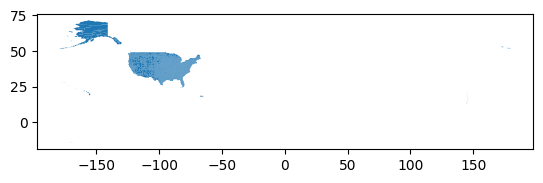

In [26]:
counties.plot()

In [27]:
counties.head()

,year,ste_code,ste_name,coty_code,coty_name,coty_area_c,coty_type,coty_name_l,coty_fp_cod,coty_gnis_c,geometry
0,2022,['29'],['Missouri'],['29081'],['Harrison'],USA,county,['Harrison County'],081,00758495,"POLYGON ((-94.23224 40.57190, -94.21326 40.572..."
1,2022,['29'],['Missouri'],['29099'],['Jefferson'],USA,county,['Jefferson County'],099,00758504,"POLYGON ((-90.63998 38.07655, -90.64027 38.076..."
2,2022,['29'],['Missouri'],['29145'],['Newton'],USA,county,['Newton County'],145,00758527,"POLYGON ((-94.05921 37.04813, -94.05936 37.043..."
3,2022,['29'],['Missouri'],['29223'],['Wayne'],USA,county,['Wayne County'],223,00758564,"POLYGON ((-90.77955 37.05032, -90.77918 37.073..."
4,2022,['30'],['Montana'],['30053'],['Lincoln'],USA,county,['Lincoln County'],053,01720038,"POLYGON ((-114.72705 49.00051, -114.72740 49.0..."


In [28]:
# Filter the Counties GeoDataFrame to include only Florida counties
florida_counties = counties[counties['ste_name'].str.contains('Florida')]

In [29]:
# Reformat the coty_name attribute in the GeoDataFrame
florida_counties['coty_name'] = florida_counties['coty_name'].apply(lambda x: x[2:-2])

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [30]:
# Rename the 'County' column to match 'coty_name' in the GeoDataFrame
temperature_data = temperature_data.rename(columns={'County': 'coty_name'})
precipitation_data = precipitation_data.rename(columns={'County': 'coty_name'})
max_temperature_data = max_temperature_data.rename(columns={'County': 'coty_name'})
min_temperature_data = min_temperature_data.rename(columns={'County': 'coty_name'})


In [31]:
# Merge the GeoDataFrame with the temperature data
temp_merge = florida_counties.merge(temperature_data, on='coty_name', how='left')
precip_merge = florida_counties.merge(precipitation_data, on='coty_name', how='left')
max_temp_merge = florida_counties.merge(max_temperature_data, on='coty_name', how='left')
min_temp_merge = florida_counties.merge(min_temperature_data, on='coty_name', how='left')

In [32]:
# Function to calculate the moving average rate
def moving_Average(row, window_size=3):
    cleaned_row = row.dropna()
    if len(cleaned_row) < window_size:  # Not enough data to calculate a moving average
        return np.nan
    moving_average = cleaned_row.rolling(window=window_size).mean().dropna()     # Calculate the moving average
    rate = (moving_average.iloc[-1] - moving_average.iloc[0]) / (len(moving_average) - 1)    # Calculate the rate of deterioration as the difference between the first and last moving average
    return abs(rate)    # Return the absolute value of the deterioration rate

In [33]:
# Apply the moving_Average function
precip_avg_cols = precip_merge.loc[:,'1976':'2023']
temp_avg_cols = temp_merge.loc[:,'1976':'2023']
precip_rate_moving_average = precip_avg_cols.apply(moving_Average, axis=1)
temp_rate_moving_average = temp_avg_cols.apply(moving_Average, axis=1)

In [34]:
precip_merge['Precipitation_Rate_Moving_Avg'] = precip_rate_moving_average
temp_merge['Temperature_Rate_Moving_Avg'] = temp_rate_moving_average

In [ ]:
# Calculate temperature and precipitation increase over the years
temp_merge['avg_temperature_increase'] = temp_merge['2023'] - temp_merge['1976']
precip_merge['precipitation_increase'] = precip_merge['2023'] - precip_merge['1976']
max_temp_merge['max_temperature_increase'] = max_temp_merge['2023'] - max_temp_merge['1976']
min_temp_merge['min_temperature_increase'] = min_temp_merge['2023'] - min_temp_merge['1976']

In [ ]:
# Create a color-coded map
florida_counties_with_temp.plot(column='temperature_increase', cmap='coolwarm', legend=True)
plt.title('Florida County Average Temperature Increase (1895-2023)')
ax.set_axis_off()
plt.show()

In [ ]:
# Define the colormap
cmap = 'coolwarm'

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
temp_merge.plot(column='avg_temperature_increase', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot
ax.set_title('Average Temperature Change in Florida Counties (1976-2023)')
ax.set_axis_off()

# Show the plot
plt.show()

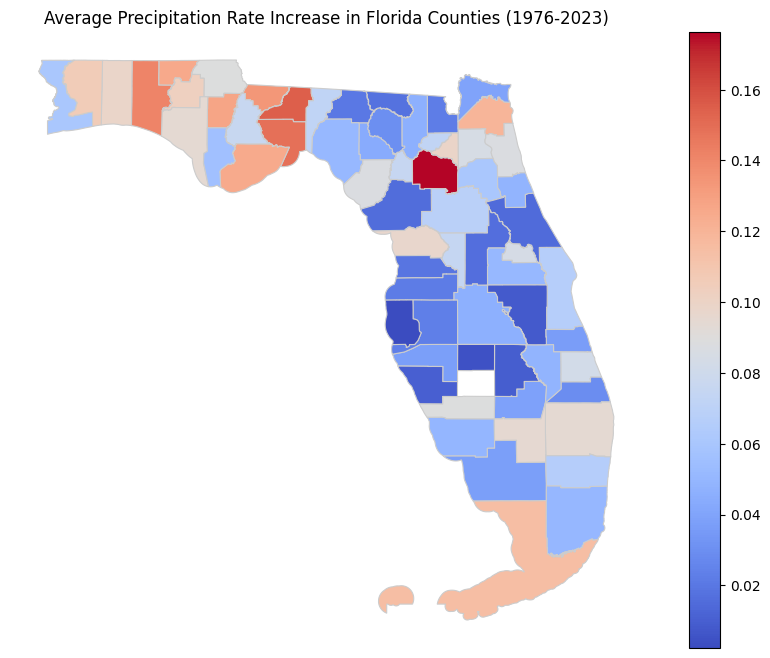

In [37]:
# Define the colormap
cmap = 'coolwarm'

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
precip_merge.plot(column='Precipitation_Rate_Moving_Avg', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot
ax.set_title('Average Precipitation Rate Increase in Florida Counties (1976-2023)')
ax.set_axis_off()

# Show the plot
plt.show()

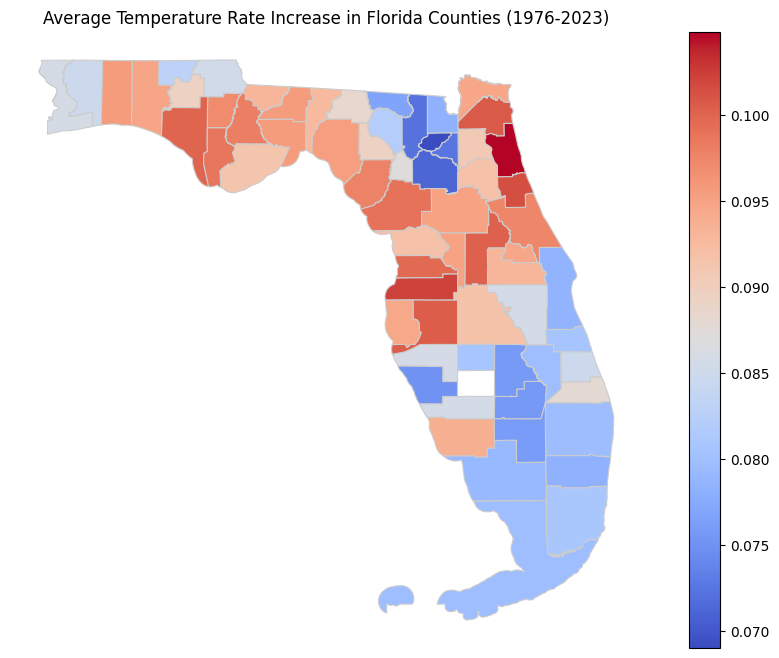

In [39]:
# Define the colormap
cmap = 'coolwarm'

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
temp_merge.plot(column='Temperature_Rate_Moving_Avg', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot
ax.set_title('Average Temperature Rate Increase in Florida Counties (1976-2023)')
ax.set_axis_off()

# Show the plot
plt.show()

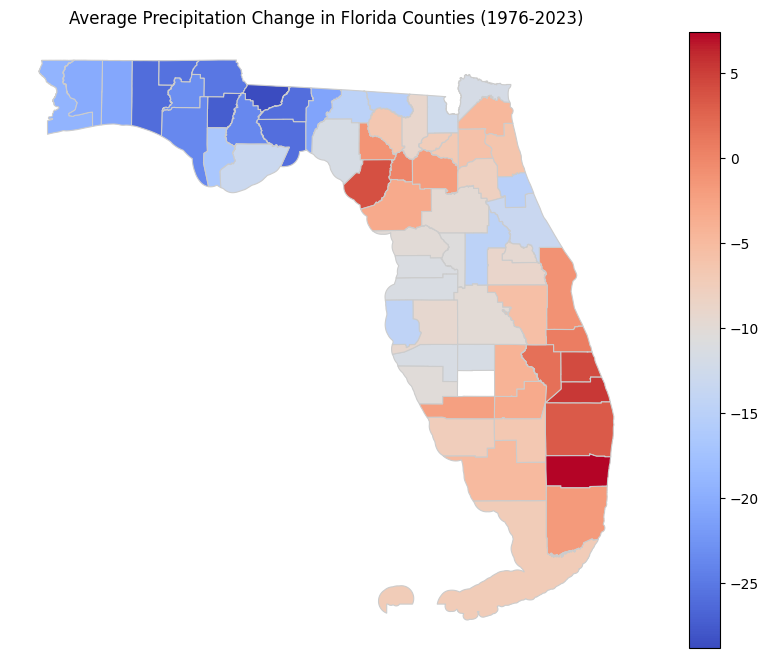

In [ ]:
# Define the colormap
cmap = 'coolwarm'

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
precip_merge.plot(column='precipitation_increase', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot
ax.set_title('Average Precipitation Change in Florida Counties (1976-2023)')
ax.set_axis_off()

# Show the plot
plt.show()

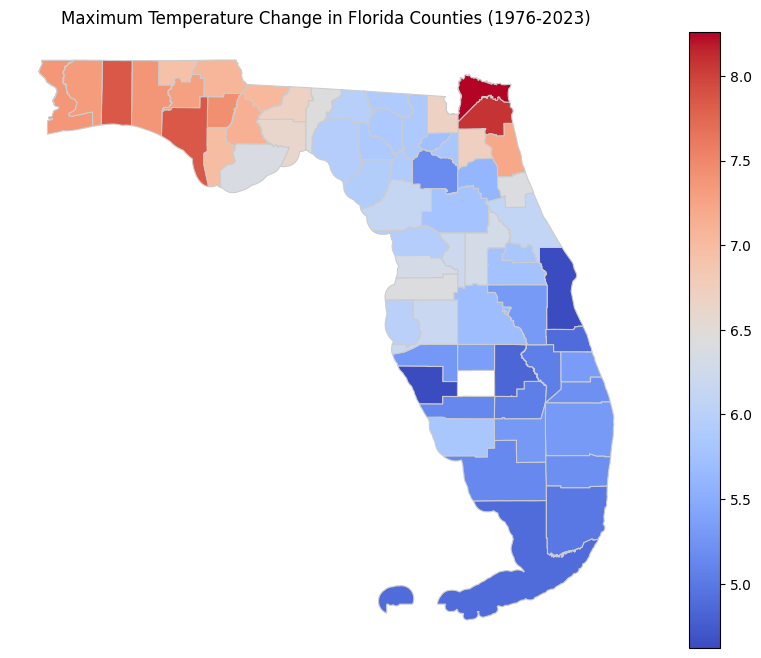

In [ ]:
# Define the colormap
cmap = 'coolwarm'

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
max_temp_merge.plot(column='max_temperature_increase', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot
ax.set_title('Maximum Temperature Change in Florida Counties (1976-2023)')
ax.set_axis_off()

# Show the plot
plt.show()

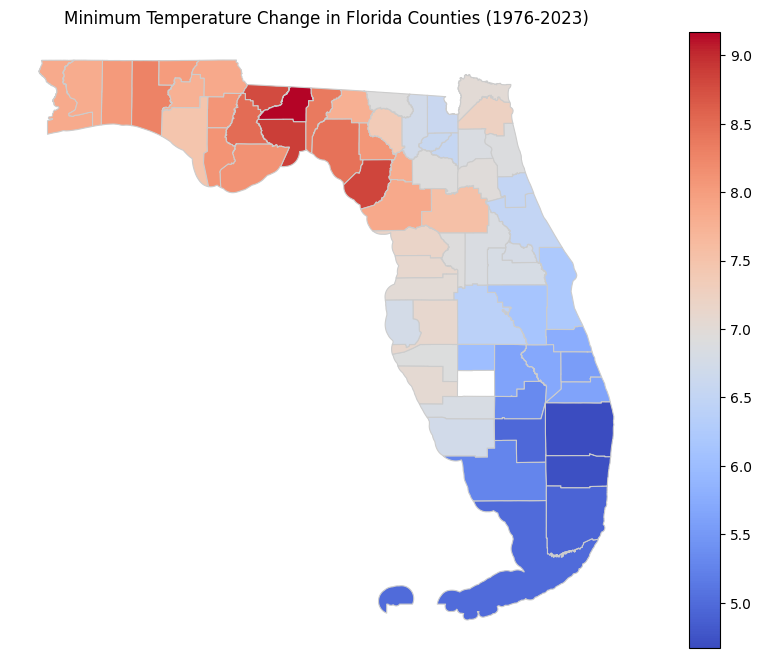

In [ ]:
# Define the colormap
cmap = 'coolwarm'

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
min_temp_merge.plot(column='min_temperature_increase', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot
ax.set_title('Minimum Temperature Change in Florida Counties (1976-2023)')
ax.set_axis_off()

# Show the plot
plt.show()

In [ ]:
# Load the shapefile and CSV data
counties = gpd.read_file('')
temperature_data = gpd.read_file('')
# pd.set_option('display.max_columns', None)
print(counties['geometry'].head(2))

# Join the temperature data to the counties
merged_data = counties.merge(temperature_data, on='common_id')

# Calculate temperature change
merged_data['temperature_change'] = merged_data['temperature_2023'] - merged_data['temperature_1895']

# Define the colormap
cmap = 'coolwarm'

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='temperature_change', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot
ax.set_title('Temperature Change in Florida Counties (1895-2023)')
ax.set_axis_off()

# Show the plot
plt.show()

In [ ]:
max_temp_merge

max_temp_merge['avg_temp_allyrs'] = max_temp_merge.loc[:, '1976':'2023'].mean(axis=1)
min_temp_merge['avg_temp_allyrs'] = min_temp_merge.loc[:, '1976':'2023'].mean(axis=1)
max_temp_merge['temp_gradient_totalavg'] = max_temp_merge['avg_temp_allyrs'] - min_temp_merge['avg_temp_allyrs']
max_temp_merge['1976_temp_gradient'] = max_temp_merge['1976'] - min_temp_merge['1976']
max_temp_merge['2000_temp_gradient'] = max_temp_merge['2000'] - min_temp_merge['2000']
max_temp_merge['2023_temp_gradient'] = max_temp_merge['2023'] - min_temp_merge['2023']
max_temp_merge['76-99_temp_gradient'] = max_temp_merge.loc[:, '1976':'1999'].mean(axis=1) - min_temp_merge.loc[:, '1976':'1999'].mean(axis=1)
max_temp_merge['00-23_temp_gradient'] = max_temp_merge.loc[:, '2000':'2023'].mean(axis=1) - min_temp_merge.loc[:, '2000':'2023'].mean(axis=1)

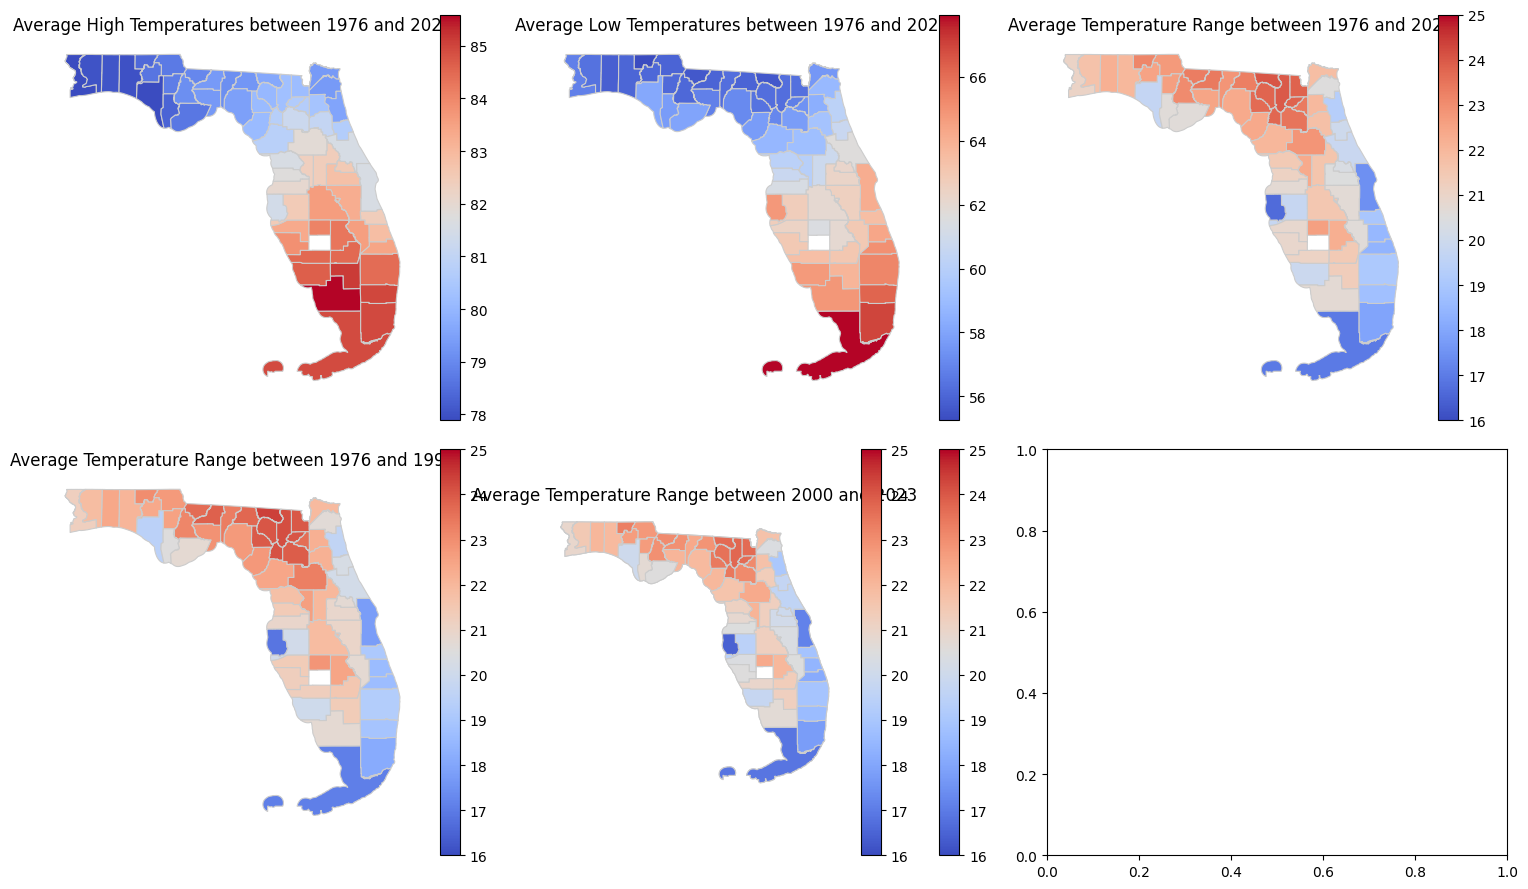

In [ ]:
cmap = 'coolwarm'

fig, axs = plt.subplots(2, 3, figsize=(15, 9))

max_temp_merge.plot(column='avg_temp_allyrs', cmap=cmap, linewidth=0.8, ax=axs[0, 0], edgecolor='0.8', legend=True)
axs[0, 0].set_title('Average High Temperatures between 1976 and 2023')
axs[0, 0].set_axis_off()

min_temp_merge.plot(column='avg_temp_allyrs', cmap=cmap, linewidth=0.8, ax=axs[0, 1], edgecolor='0.8', legend=True)
axs[0, 1].set_title('Average Low Temperatures between 1976 and 2023')
axs[0, 1].set_axis_off()

max_temp_merge.plot(column='temp_gradient_totalavg', cmap=cmap, linewidth=0.8, ax=axs[0, 2], edgecolor='0.8', legend=True, vmin=16, vmax=25)
axs[0, 2].set_title('Average Temperature Range between 1976 and 2023')
axs[0, 2].set_axis_off()

max_temp_merge.plot(column='76-99_temp_gradient', cmap=cmap, linewidth=0.8, ax=axs[1, 0], edgecolor='0.8', legend=True, vmin=16, vmax=25)
axs[1, 0].set_title('Average Temperature Range between 1976 and 1999')
axs[1, 0].set_axis_off()

max_temp_merge.plot(column='00-23_temp_gradient', cmap=cmap, linewidth=0.8, ax=axs[1, 1], edgecolor='0.8', legend=True, vmin=16, vmax=25)
axs[1, 1].set_title('Average Temperature Range between 2000 and 2023')
axs[1, 1].set_axis_off()

max_temp_merge.plot(column='00-23_temp_gradient', cmap=cmap, linewidth=0.8, ax=axs[1, 1], edgecolor='0.8', legend=True, vmin=16, vmax=25)
axs[1, 1].set_title('Average Temperature Range between 2000 and 2023')
axs[1, 1].set_axis_off()

# max_temp_merge.plot(column='1976_temp_gradient', cmap=cmap, linewidth=0.8, ax=axs[1, 0], edgecolor='0.8', legend=True, vmin=16, vmax=25)
# axs[1, 0].set_title('Temperature Range in 1976')
# axs[1, 0].set_axis_off()

# max_temp_merge.plot(column='2000_temp_gradient', cmap=cmap, linewidth=0.8, ax=axs[1, 1], edgecolor='0.8', legend=True, vmin=16, vmax=25)
# axs[1, 1].set_title('Temperature Range in 1976')
# axs[1, 1].set_axis_off()

# max_temp_merge.plot(column='2023_temp_gradient', cmap=cmap, linewidth=0.8, ax=axs[1, 2], edgecolor='0.8', legend=True, vmin=16, vmax=25)
# axs[1, 2].set_title('Temperature Range in 1976')
# axs[1, 2].set_axis_off()

plt.tight_layout()
plt.show()

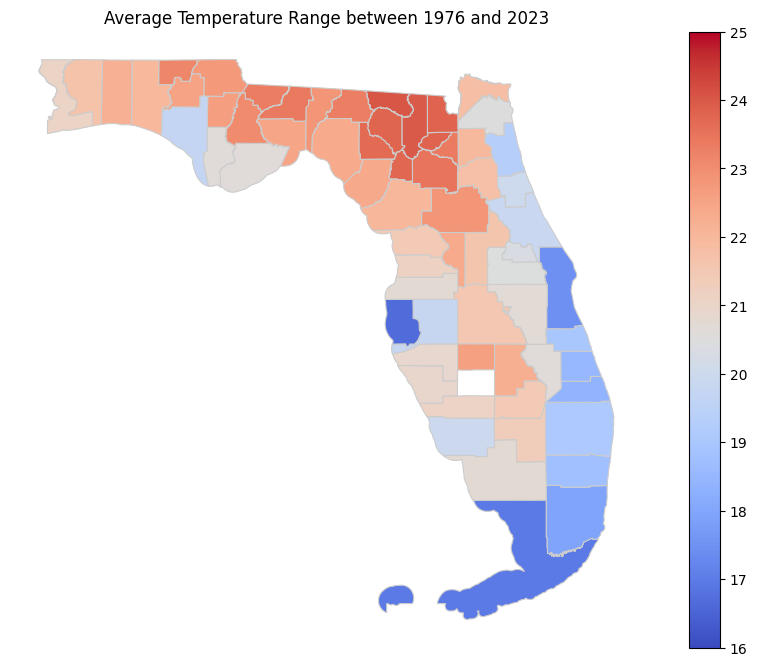

In [ ]:
# Define the colormap
cmap = 'coolwarm'

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
max_temp_merge.plot(column='temp_gradient_totalavg', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=16, vmax=25)
ax.set_title('Average Temperature Range between 1976 and 2023')

# Customize the plot
ax.set_axis_off()

# Show the plot
plt.show()

In [ ]:
min_value = max_temp_merge['2023_temp_gradient'].min()
max_value = max_temp_merge['2023_temp_gradient'].max()

print("Min Value:", min_value)
print("Max Value:", max_value)

min_value = max_temp_merge['76-99_temp_gradient'].min()
max_value = max_temp_merge['76-99_temp_gradient'].max()

print("Min Value:", min_value)
print("Max Value:", max_value)

min_value = max_temp_merge['00-23_temp_gradient'].min()
max_value = max_temp_merge['00-23_temp_gradient'].max()

print("Min Value:", min_value)
print("Max Value:", max_value)

Min Value: 17.03
Max Value: 24.550000000000004
Min Value: 16.844166666666652
Max Value: 24.38583333333333
Min Value: 16.44791666666667
Max Value: 23.753750000000004
